<h1><center>ECE 685D, Fall 2020 </center></h1>

<h2><center>Problem Set 3 </center></h2>
<h2><center> Full name: Srishti Saha (ss1078)</center></h2>


### Problem 1: Supervised Learning of a Probabilistic Model

We have the CDF given as:

\begin{aligned}
F(z \mid \mathbf{x}, \mathbf{w}) &=\exp \{-\exp \{\mu(\mathbf{x}, \mathbf{w})-z\}\}
\end{aligned}



\begin{aligned}
f(z \mid \mathbf{x}, \mathbf{w}) &=\frac{\partial}{\partial z} F(z \mid \mathbf{x}, \mathbf{w}) \\
&=\exp \{-\exp \{\mu(\mathbf{x}, \mathbf{w})-z\}\}(\exp \{\mu(\mathbf{x}, \mathbf{w})-z)
\end{aligned}

For maximum likelihood, taking log likelihood:

\begin{aligned}
-\log (\mathcal{L}(\mathbf{w} \mid \mathcal{D})) &=-\log \left(\prod_{i=1}^{N} f\left(z_{i} \mid \mathbf{x}^{(\mathbf{i})} w\right)\right) \\
&=-\log \left(\prod_{i=1}^{N} \exp \left\{-\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right\}\left(\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right)\right.\\
&=-\sum_{i=1}^{N} \log \left(\exp \left\{-\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right\}\left(\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right)\right.\\
&=-\sum_{i=1}^{N}\left(\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}-\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right)
\end{aligned}

Now we do the gradient calculation:

\begin{aligned}
\frac{\partial L}{\partial w}=\frac{\partial L}{\partial g} \frac{\partial g}{\partial w} \\
=\frac{\partial L}{\partial g} \frac{\partial g}{\partial a} \frac{\partial a}{\partial w} 
\end{aligned}

\begin{aligned}
-\frac{\partial \log (\mathcal{L}(\mathbf{w} \mid \mathcal{D}))}{\partial \mathbf{w}} &=-\frac{\partial}{\partial \mathbf{w}} \sum_{i=1}^{N}\left(\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}-\exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}\right) \\
&=-\sum_{i=1}^{N} \frac{\partial \mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)}{\partial \mathbf{w}}-\frac{\partial \exp \left\{\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right)-z_{i}\right\}}{\partial \mathbf{w}} \\
\mu\left(\mathbf{x}^{(\mathbf{i})}, \mathbf{w}\right) &=\sum_{j=1}^{3} g_{j}\left(a_{j}\right) \\
&=\mathbf{x}_{1}^{(\mathbf{i})} w_{1}+\mathbf{x}_{3}^{(\mathbf{i})} w_{3}+\sigma\left(a_{1}+\mathbf{x}_{2}^{(\mathbf{i})} w_{2}+a_{3}\right)+\mathbf{x}_{1}^{(\mathbf{i})} w_{1}-\mathbf{x}_{3}^{(\mathbf{i})} w_{3} \\
&=2 \mathbf{x}_{1}^{(\mathbf{i})} w_{1}+\sigma\left(2 \mathbf{x}_{1}^{(\mathbf{i})} w_{1}+\mathbf{x}_{2}^{(\mathbf{i})} w_{2}\right)
\end{aligned}


Let us represent $\sigma_i= \sigma(2x_1^{(i)}w_1 + x_2^{(i)}w_2)$

Then we can representthe gradient of loss $(\mathcal{L}(\mathbf{w} \mid \mathcal{D}))$ w.r.t $\mathbf{w}$ as:
\begin{aligned}
-\frac{\partial \log (\mathcal{L}(\mathbf{w} \mid \mathcal{D}))}{\partial \mathbf{w}} &=\left[-\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{1}},-\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{2}},-\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{3}}\right] \\
\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{1}} &=-\sum_{i=1}^{N} 2 x_{1}^{(i)}\left(1+\sigma_{i}-\sigma_{i}^{2}\right)\left(1-\exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\right) \\
\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{2}} &=-\sum_{i=1}^{N} x_{2}^{(i)} \sigma_{i}\left(1-\sigma_{i}\right)\left(1-\exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\right) \\
\frac{\partial \log \mathcal{L}}{\partial \mathbf{w}_{3}} &=0
\end{aligned}

#### Pseudo-code: For stochastic-gradient descent

*Inputs*: Data $(x^{(i)},z^{(i)})_{i \in (1,N)}$ , mini-batch size $B$, learning rate $\eta$ ;
<br/>
*Initialize weights*: $w_0$, k $\leftarrow$ 0
<br/>
for $e_i$ in epochs:
<br/>
$\quad$ for $b_i$ in batch_indices:
<br/>
$\quad\quad$ batch_gradient $\leftarrow \triangledown (f(w_k))$
<br/>
$\quad\quad w_{k+1}= w_{k}-\eta\triangledown (f(w_k))$
<br/>
$\quad\quad k=k+1$
<br/>
$\quad end$
<br/>
$end$

For calculating Hessian $H$, we do:

$$
H=\left[\begin{array}{ccc}
h_{11} & h_{12} & 0 \\
h_{21} & h_{22} & 0 \\
0 & 0 & 0
\end{array}\right]$$


where:
\begin{aligned}
h_{11} &=-\sum_{i=1}^{N} 2 x^{(i)}\left(1-\exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\right)\left(\sigma_{i}-\sigma_{i}^{3}\right)-2 x^{(i)} \exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\left(1+\sigma_{i}-\sigma_{i}^{2}\right)^{2} \\
h_{22} &=-\sum_{i=1}^{N} x_{2}^{(i)^{2}} \sigma_{i}\left(1-\sigma_{i}\right)\left(1-2 \sigma_{i}\right)\left(1-\exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\right)-x_{2}^{(i)^{2}} \sigma_{i}^{2}\left(1-\sigma_{i}\right)^{2} \exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right) \\
h_{12} &=h_{21}=-\sum_{i=1}^{N} 2 x_{1}^{(i)} x_{2}^{(i)}\left(1-\exp \left(\mu\left(x^{(i)}, w\right)-z_{i}\right)\right) \sigma_{i}\left(1-\sigma_{i}\right)\left(1-2 \sigma_{i}\right)-2 x_{1}^{(i)} x_{2}^{(i)}\left(1+\sigma_{i}-\sigma_{i}^{2}\right)^{2}
\end{aligned}

#### Pseudo-code for minimizing L(w | D) using Newton’s method

*Inputs*: Data $(x^{(i)},z^{(i)})_{i \in (1,N)}$ , mini-batch size $B$, learning rate $\eta$ ;
<br/>
*Initialize weights*: $w_0$, k $\leftarrow$ 0
<br/>
for $e_i$ in epochs:
<br/>
$\quad$ for $b_i$ in batch_indices:
<br/>
$\quad\quad$ batch_gradient $\leftarrow \triangledown (f(w_k))$
<br/>
$\quad\quad$ second_gradient $\leftarrow \triangledown^2 (f(w_k))$
<br/>
$\quad\quad w_{k+1}= w_{k}-\eta[\triangledown^2 (f(w_k))]^{-1} \triangledown (f(w_k))$
<br/>
$\quad\quad k=k+1$
<br/>
$\quad end$
<br/>
$end$

### Problem 2: Bayes Decision Rule


We have been given the indicator loss function as:


$
\begin{equation*}
L(f(x),t) = \begin{cases}
    0 & \text{if } f(x)=t\\
    1              & \text{if } f(x)\neq t
\end{cases}
\end{equation*}
$

The risk corresponding to this loss function is equal to the average probability of error because the conditional risk for the two-category classification is:

$
\begin{equation*}
Risk= \sum_{n} (L(f(x),t_{m}))*P(t_{n}|x))
\end{equation*}
$
Here, $t_{m}$ and $t_{n}$ depict the possible outcomes i.e. ${-1,1}$ for binary classification. For **the state of an error, this risk is**:

$
\begin{equation*}
Risk= \sum P(t_{n}|x) = 1- P(t=1|x)
\end{equation*}
$


The expectation of the total loss can be repesented as the expectation of the probability of misclassification in the following manner:

$
\begin{equation*}
L_{D}(f) = E_{x,t~D} [P(f(x)\neq t)] = E_{x,t~D} \begin{cases}
    P(t=1|x) & \text{if } f(x)=-1\\
    1 - P(t=1|x)              & \text{if } f(x)=1
\end{cases}
\end{equation*}
$

Thus, the Bayesian decision rule, $f*(x)$ is

$
\begin{equation*}
f*(x) = arg \min_{f} L_{D}(f) = \begin{cases}
    1 & \text{if } P(t=1|x) > 1 - P(t=1|x) \\
    -1             & \text{if } P(t=1|x) < 1 - P(t=1|x)
\end{cases}
\end{equation*}
$

To minimize the population risk, we should select the condition that maximizes the posterior probability $P(t=1|x)$. In other words, for minimum error rate or minimum risk:


$
P(t=1|x) > 1 - P(t=1|x) \\
2P(t=1|x) \geq 1
$


$
\begin{equation*}
P(t=1|x) \geq 1/2
\end{equation*}
$


This proves that population risk is minimized by:
$
\begin{equation*}
f*(x) =  \begin{cases}
    1 & \text{if } P(t=1|x) \geq \frac{1}{2} \\
    -1             & otherwise
\end{cases}
\end{equation*}
$

### Problem 3: Binary Classification with Generalized Linear Models

In [3]:
# import packages  
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import Tensor
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

In [375]:
""" data preparation """

# read csv file 
df = pd.read_csv('breast_cancer.csv')  

# extract the 'diagnosis' column as your targets 
targets = pd.get_dummies(df.diagnosis).M
df['label']=targets
df=df.drop(['diagnosis'],axis=1)

# train/test split 
X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.3, random_state=40)

#### Problem 3.1
* #### __Important :__  You are not allowed to use built-in LDA functions from the sklearn package. 

In [275]:
# prep data
class_feature_means=pd.DataFrame(columns=X_train.label.unique())
for c,rows in X_train.groupby('label'):
    rows=rows.drop(['id','label'],axis=1)
    class_feature_means[c]=rows.mean()
    
sigma=np.array(X_train.drop(['id','label'],axis=1).cov())

prob_log_c0_bias = class_feature_means[0].T @ np.linalg.inv(sigma) @ class_feature_means[0] + np.log(y_train.value_counts(normalize=True)[0])
prob_log_c0_coef = -2*np.linalg.inv(sigma) @ class_feature_means[0]

prob_log_c1_bias = class_feature_means[1].T @ np.linalg.inv(sigma) @ class_feature_means[1] + np.log(y_train.value_counts(normalize=True)[1])
prob_log_c1_coef = -2*np.linalg.inv(sigma) @ class_feature_means[1]

In [10]:
def log_loss_function(y_hat,y):
    loss = ((-1*y * np.log(y_hat))-((1-y)* np.log(1-y_hat))).mean()
    return loss

def accuracy_calc_lda(preds, actuals):
    y_pred_tag = np.round(preds)
    correct_results_sum = (y_pred_tag == actuals).sum()
    acc = correct_results_sum/actuals.shape[0]
    acc = np.round(acc * 100)   
    return acc

def predict_lda(inputs,targets):
    # logs of probabilities
    prob_c0_log = prob_log_c0_coef @ (np.array(inputs)).T + prob_log_c0_bias
    prob_c1_log = prob_log_c1_coef @ (np.array(inputs)).T + prob_log_c1_bias
    prob_ratio = np.exp(prob_c0_log-prob_c1_log)
    accuracy_lda= accuracy_calc_lda(prob_ratio/(1+prob_ratio),targets)
    loss_lda=log_loss_function(prob_ratio/(1+prob_ratio),targets)
    return(accuracy_lda,loss_lda)

In [284]:
acc_train,logloss_train=predict_lda(X_train.drop(['id','label'],axis=1),y_train)
acc_test,logloss_test=predict_lda(X_test.drop(['id','label'],axis=1),y_test)

In [291]:
print("Training data stats: \n",
     "Accuracy:",acc_train,"% \n",
     "Cross Entropy Loss:",np.round(logloss_train,4),"\n",
     "-------------------- \n"
     "Test data stats: \n",
     "Accuracy:",acc_test,"% \n",
     "Cross Entropy Loss:",np.round(logloss_test,4),"\n")

Training data stats: 
 Accuracy: 93.0 % 
 Cross Entropy Loss: 0.1978 
 -------------------- 
Test data stats: 
 Accuracy: 95.0 % 
 Cross Entropy Loss: 0.2042 



#### Problem 3.2

In [374]:
# read csv file 
df = pd.read_csv('breast_cancer.csv')  

# extract the 'diagnosis' column as your targets 
targets = pd.get_dummies(df.diagnosis).M

    
# extract your features data
data = df[[ 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
            'symmetry_se', 'fractal_dimension_se']]

# train/test split 
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=40)

In [353]:
X_train= Variable(Tensor(np.array(X_train)))
y_train = Variable(Tensor(np.array(y_train)))
X_test= Variable(Tensor(np.array(X_test)))
y_test = Variable(Tensor(np.array(y_test)))
input_dim = X_train.size()[1]
output_dim = 1

In [221]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=input_dim,out_features=output_dim)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    pass

def accuracy_calc(preds, actuals):
    y_pred_tag = torch.round(preds)
    #print("printing preds:",y_pred_tag)
    correct_results_sum = (y_pred_tag == actuals).sum().float()
    acc = correct_results_sum/actuals.shape[0]
    acc = torch.round(acc * 100)   
    return acc

def train_model(model_,criterion_,optimizer_,X_train,y_train,X_test,y_test,title1, title2):
    train_losses = [] 
    test_losses = []
    train_accuracies=[]
    test_accuracies=[]
    for epoch in range(1000):
        model_.train()
        optimizer_.zero_grad()
        # Forward pass
        y_pred = model_(X_train)
        #print(y_pred)
        # Compute Loss
        loss = criterion_(y_pred, y_train.unsqueeze(1))
        # Backward pass
        loss.backward()
        optimizer_.step()
        
        #test predictions
        test_pred=model_(X_test)
        # Compute accuracies
        
        train_accuracy_score = accuracy_calc(y_pred,y_train.unsqueeze(1))
        test_accuracy_score = accuracy_calc(test_pred,y_test.unsqueeze(1))
        #print(train_accuracy_score)
        #print("actual_train:",y_train.shape)
        #print("pred_train:",y_pred.reshape([len(y_pred),]))
        # append scores into an array
        train_accuracies.append(float(train_accuracy_score))
        test_accuracies.append(float(test_accuracy_score))
        train_losses.append(float(loss))
        test_losses.append(float(criterion_(test_pred, y_test.unsqueeze(1))))
        pass
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    
    fig.tight_layout(pad=3)
    ax[0].plot(train_losses,label='training loss')
    ax[0].plot(test_losses,label='testing loss')
    ax[0].legend(); 
    ax[0].set_xlabel('epoch'); 
    ax[0].set_ylabel('Cross entropy losses')
    ax[0].set_title(title1)
    
    ax[1].plot(train_accuracies,label='training accuracy')
    ax[1].plot(test_accuracies,label='testing accuracy')
    ax[1].legend(); 
    ax[1].set_xlabel('epoch'); 
    ax[1].set_ylabel('Accuracies')
    ax[1].set_title(title2)
    plt.suptitle("Plots for Cross-entropy losses and Accuracies")
    plt.show()
    pass

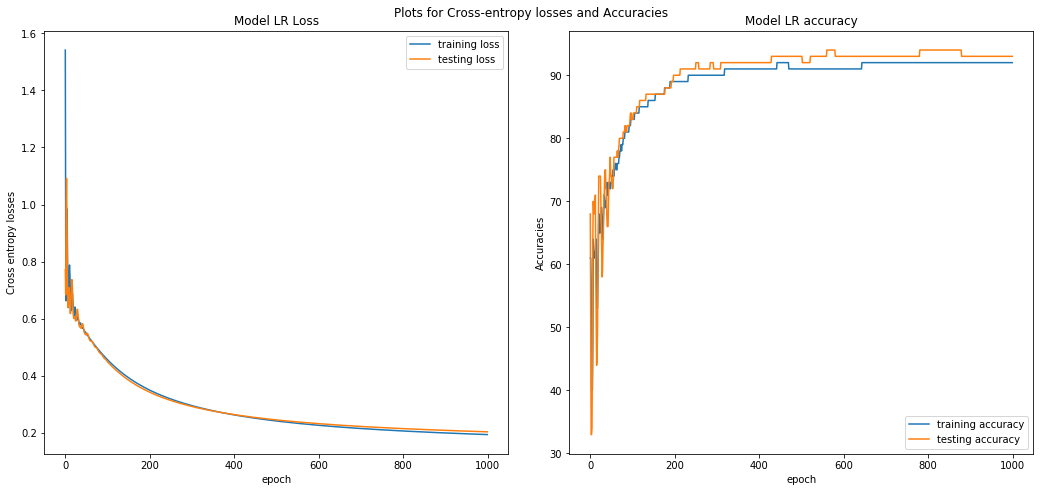

In [243]:
torch.manual_seed(500)
mod_LR = LogisticRegression()
criterion_LR = torch.nn.BCELoss()
optimizer_LR = torch.optim.Adam(mod_LR.parameters(), lr=0.05,betas=(0.9,0.999))
train_model(mod_LR,criterion_LR,optimizer_LR,X_train,y_train,X_test,y_test,"Model LR Loss", "Model LR accuracy")

#### Problem 3.3

For a binary class problem, if we define $p_0$ and $p_1$ as the probabilities for class 0 and class 1 respectively, the log odds for both the methods can be defined in the following manner:

**For logistic regression:**

$$
\log \left(\frac{p_{0}}{p_{1}}\right)=\sum_{i=1}^{12} w_{i} x_{i}^{(k)}+w_{0}
$$
where $w_0,... w_{12}$ are the bias and weights for each feature and the log odds is calculated
for $k^{th}$ sample.

**For Linear Discriminant Analysis:**

$$
\log \left(\frac{p_{0}}{p_{1}}\right)=\frac{\left(x_{i}^{(k)}-\mu_{0}\right)^{T} \Sigma^{-1}\left(x_{i}^{(k)}-\mu_{0}\right) h_{0}}{\left(x_{i}^{(k)}-\mu_{1}\right)^{T} \Sigma^{-1}\left(x_{i}^{(k)}-\mu_{1}\right) h_{1}}
$$
where , $h_0$ and $h_1$ are the prior probabilities of class 0 and 1, $\Sigma$ is the co-variance matrix of the data and $\mu_0, \mu_1$ are the mean of the features for samples in class 0 and 1 respectively. 


Now, while LDA assumes a distribution on the data, Logistic regression does not make these assumptions. LDA also assumes that co-variance of both the classes is same and Logistic Regression does not make this assumption.

We also see that while LR works on ordinary least squares method, and LDA uses maximum a-posteriori optimization.


### Problem 4: Binary Classification with Neural Networks

#### Problem 4.1

In a multinomial LR model, the probability that a data sample $x^{(k)}$ lies in class $c$ is defined by:

$
\begin{equation*}
P\left(y_{k}=c\right)=\frac{\exp ^{-\left(W_{c}^{T} x^{(k)}+b\right)}}{\sum_{j=1}^{C} \exp ^{-\left(W_{j}^{T} x^{(k)}+b\right)}}
\end{equation*}
$
Here, the matrix of weights W is learnt from the data itself.

In other words:


If we assume a neural network with **N** input nodes and **K** output nodes and no hidden layers and softmax activation. Similarly, we assume a logistic regression (softmax to calculate probabilities) with **N** parameters and **K** output classes. There models then both have a single KxN weight matrix and a KxN jacobian matrix. The weight matrix can be obtained by minimizing a loss function (assumed to be the same between logistic regression and the neural network) as follows:
$$
\begin{aligned}
\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial g} \frac{\partial g}{\partial w} \\
&= \frac{\partial L}{\partial g} \frac{\partial g}{\partial a} \frac{\partial a}{\partial w}
\end{aligned}
$$


From the above equation, we see that both models share the same loss function and activation function (softmax). Thus, the value of $\frac{\partial L}{\partial g}$ will be the same for both the models. Moreover, both models have the same architecture and starting weight matrix, and hence, both $\frac{\partial g}{\partial a}$ and $\frac{\partial a}{\partial w}$ will be the same between the models. This implies the their final resultant $KxN$ matrix will also be equivalent after a given number of epochs and using a given starting state.

In other words, a Multinomial LR model is generalization of two-class LR model. For a neural network, every input $x^{(k)}$ goes through to the output layer nodes (node 1 to c). Using the Softmax estimation, we calculate the probability of the respective class. Hence, this is equivalent to a multinomial LR model.

#### Problem 4.2

In [6]:
import torch
import torch.nn as nn
import itertools

In [246]:
############## Part a #######################
def nn_block(input_M, out_M, *args, **kwargs):
    return torch.nn.Sequential(
        torch.nn.Linear(input_M,out_M, *args, **kwargs),
        torch.nn.ReLU()
    )

class MLP(torch.nn.Module):
    def __init__(self,in_features,out_features,N,M,bias):
        super().__init__()
        #define sizes of hidden layers
        self.hidden_layers=[in_features] + [M]*N
        NN_blocks=[nn_block(input_M,out_M)
                  for input_M,out_M in zip(self.hidden_layers, self.hidden_layers[1:])]
        
        self.linear_layer1=torch.nn.Sequential(*NN_blocks)
        self.linear_layer2=torch.nn.Linear(in_features=self.hidden_layers[-1],
                                          out_features=out_features, bias=bias)
    def forward(self, x):
        x = self.linear_layer1(x)
        x = self.linear_layer2(x)
        return torch.sigmoid(x)
    pass

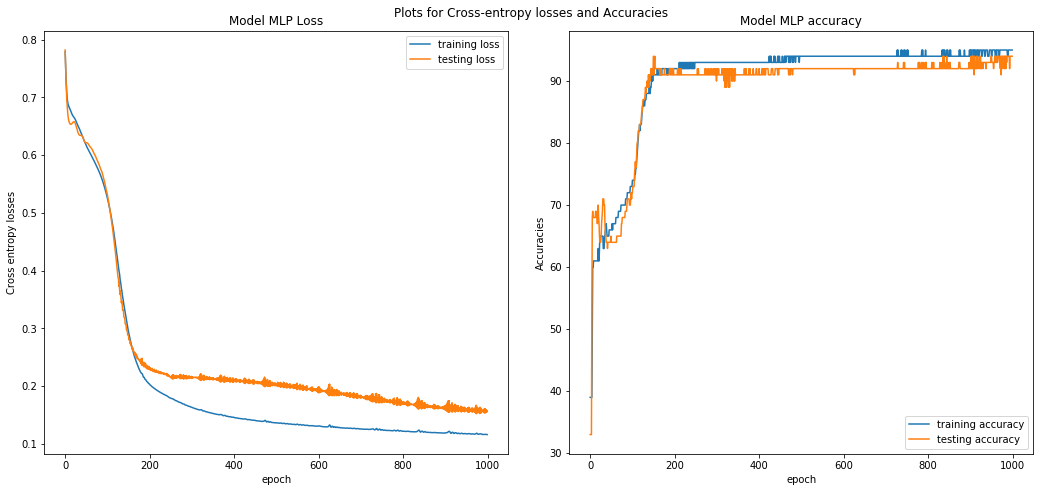

In [253]:
torch.manual_seed(600)
model_MLP = MLP(in_features=12,out_features=1,N=2,M=16,bias=True)
criterion_MLP = torch.nn.BCELoss()
optimizer_MLP = torch.optim.SGD(model_MLP.parameters(), lr=0.003)

train_model(model_MLP,criterion_MLP,optimizer_MLP,X_train,y_train,X_test,y_test,"Model MLP Loss", "Model MLP accuracy")

In [354]:
############## Part b #################
def train_model_MN(model_,criterion_,optimizer_,X_train,y_train,X_test,y_test):

    for epoch in range(1000):
        model_.train()
        optimizer_.zero_grad()
        # Forward pass
        y_pred = model_(X_train)
        #print(y_pred)
        # Compute Loss
        loss = criterion_(y_pred, y_train.unsqueeze(1))
        # Backward pass
        loss.backward()
        optimizer_.step()
        
        #test predictions
        test_pred=model_(X_test)
        # Compute accuracies
        
        train_accuracy_score = float(accuracy_calc(y_pred,y_train.unsqueeze(1)))
        test_accuracy_score = float(accuracy_calc(test_pred,y_test.unsqueeze(1)))
        # store losses
        train_loss=float(loss)
        test_loss= float(criterion_(test_pred, y_test.unsqueeze(1)))
    return (train_loss,test_loss,train_accuracy_score,test_accuracy_score)

In [364]:
Ms=[2,4,8,16,32,64,128]
Ns=[1,2,3,4,5,6,7,8]

torch.manual_seed(600)
accuracies=np.zeros((len(Ms),len(Ns)))
weight_gradients=np.zeros((len(Ms),len(Ns)))
for m,n in itertools.product(range(len(Ms)),range(len(Ns))):
    model_MN=MLP(12,1,N=Ns[n],M=Ms[m],bias=True)
    criterion_MN=torch.nn.BCELoss()
    optimizer_MN=torch.optim.SGD(model_MN.parameters(), lr=0.003)
    # train and test the model
    loss_train,loss_test,acc_train,acc_test=train_model_MN(model_MN,criterion_MN,optimizer_MN,
                                                           X_train,y_train,X_test,y_test)
    w_g=model_MN.linear_layer1[0][0].weight.grad
    frob_norm= np.linalg.norm(w_g)
    weight_gradients[m,n]=frob_norm
    accuracies[m,n]=acc_test

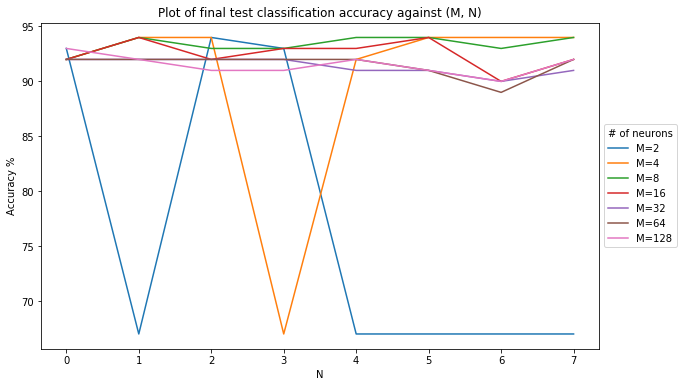

In [366]:
labels= ["M=2","M=4","M=8","M=16","M=32","M=64","M=128"]

plt.figure(figsize=(10,6))
for i in range(accuracies.shape[0]):
    plt.plot(accuracies[i],label=labels[i])
    plt.xlabel('N')
    plt.ylabel('Accuracy %')
    plt.title('Plot of final test classification accuracy against (M, N)')
    plt.legend(loc='center left',title= '# of neurons', bbox_to_anchor=(1, 0.5))
plt.show()

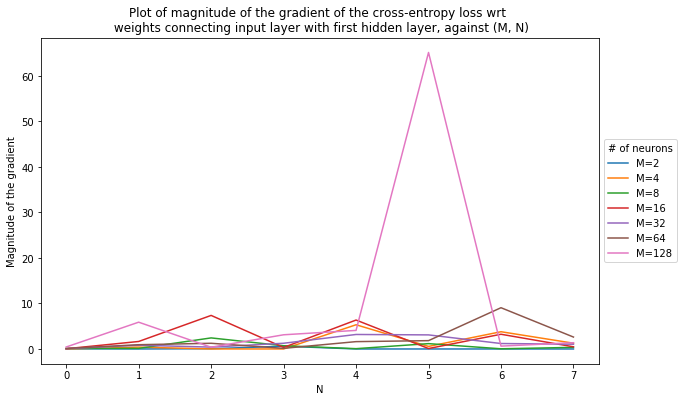

In [367]:
plt.figure(figsize=(10,6))
for i in range(weight_gradients.shape[0]):
    plt.plot(weight_gradients[i],label=labels[i])
    plt.xlabel('N')
    plt.ylabel('Magnitude of the gradient')
    plt.title('Plot of magnitude of the gradient of the cross-entropy loss wrt \n weights connecting input layer with first hidden layer, against (M, N)')
    plt.legend(loc='center left',title= '# of neurons', bbox_to_anchor=(1, 0.5))
plt.show()

There is no clear trend in the plot of gradient of the cross-entropy loss wrt \n weights connecting input layer with first hidden layer, against (M, N). We see that for a high number of neurons (M=128) for N=5 layers, the magnitude of the gradient is high.


FOr the accuracies, we see that for a high number of neurons, all models (irrespective of the number of layers) have a high frequency i.e. (in the range of 90-95%). However, with M=2, models are not showing any particular trend. They are unrelaible in terms of accuracy though. For instance, for M=2 and N=1, the accuracy of the 

#### Problem 4.3
* #### __Important :__  Here, you are not allowed to use the Optim package. 

In [71]:
from sklearn import preprocessing
import torch
import torch.nn as nn
import pandas as pd

In [72]:
# read csv file 
df = pd.read_csv('breast_cancer.csv')  
targets = np.array(pd.get_dummies(df.diagnosis).M).reshape(-1,1)
data = df.iloc[:,2:]

min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data.values )

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=40)

In [73]:
# enter your solution to problem 4.3 here
class NN_scratch(nn.Module):
    def __init__(self,input_dim = 12,hidden_dim = 16,output_dim = 1,learn_rate = 0.003):
        ###### initialization ######
        super().__init__()
        self.train_loss = []
        self.test_loss = []
        self.train_accuracy = []
        self.test_accuracy = []
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learn_rate = learn_rate

        self.w1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.w2 = np.random.randn(self.hidden_dim, self.hidden_dim)
        self.w3 = np.random.randn(self.hidden_dim, self.output_dim)
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def RELU_self(self, x):
        return np.maximum(x, 0)
    
    def relu_p(self,x):
        return (x > 0) * 1
    
    def CE_loss(self, y_hat, Y):
        cross_entropy_loss = -1*(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat))
        return (cross_entropy_loss.mean())
    
    def forward(self, X):
        self.z1 = np.dot(X, self.w1)
        self.layer1 = self.RELU_self(self.z1)
        
        self.z2 = np.dot(self.layer1,self.w2)
        self.layer2 = self.RELU_self(self.z2)
        
        self.z3 = np.dot(self.layer2, self.w3)
        self.layer3 = self.sigmoid(self.z3)  
        return self.layer3
    
    def backward_prop(self, X, Y):
        m = X.shape[0]
        self.dZ3 = self.layer3 - Y 
        self.dW3 = (1/m)*np.dot(self.layer2.T, self.dZ3)
        
        self.dZ2 = self.relu_p(np.dot(self.dZ3,self.w3.T))    
        self.dW2 = (1/m)*np.dot(self.layer1.T, self.dZ2)   
        
        self.dZ1 = self.relu_p(np.dot(self.dZ2,self.w2.T))
        self.dW1 = (1/m)*np.dot(X.T, self.dZ1)  
        
        self.w1 -= self.learn_rate * self.dW1
        self.w2 -= self.learn_rate * self.dW2
        self.w3 -= self.learn_rate * self.dW3
        
    def train(self, X_train, y_train, X_test, y_test, lr = 0.05):
        self.learn_rate = lr
        #forward
        y_hat_train = self.forward(X_train)
        y_hat_test = self.predict(X_test)
        # compute and store losses
        self.train_loss.append(self.CE_loss(y_hat_train, y_train))  
        self.test_loss.append(self.CE_loss(y_hat_test, y_test))
        # backward propagation
        self.backward_prop(X_train,y_train)
        # compute and store accuracies
        self.train_accuracy.append(accuracy_calc_lda(self.predict(X_train), y_train))
        self.test_accuracy.append(accuracy_calc_lda(self.predict(X_test,), y_test))
        return(self.train_loss,self.test_loss,self.train_accuracy,self.test_accuracy)
        
    def predict(self, X):
        layer1 = self.RELU_self(np.dot(X, self.w1))
        layer2 = self.RELU_self(np.dot(layer1,self.w2))
        layer3 = self.sigmoid(np.dot(layer2, self.w3))  
        
        return layer3
        

In [74]:
model_NN_self= NN_scratch()

In [75]:
loss_train,loss_test,acc_train,acc_test = model_NN_self.train(X_train, y_train, X_test, y_test, lr = 0.005)

In [79]:
results_NN_self= pd.DataFrame({'epoch':list(range(1, 3002)),
                               'Train_loss':loss_train,'Test_loss':loss_test,
                               'Train_acc':acc_train,'Test_acc':acc_test})

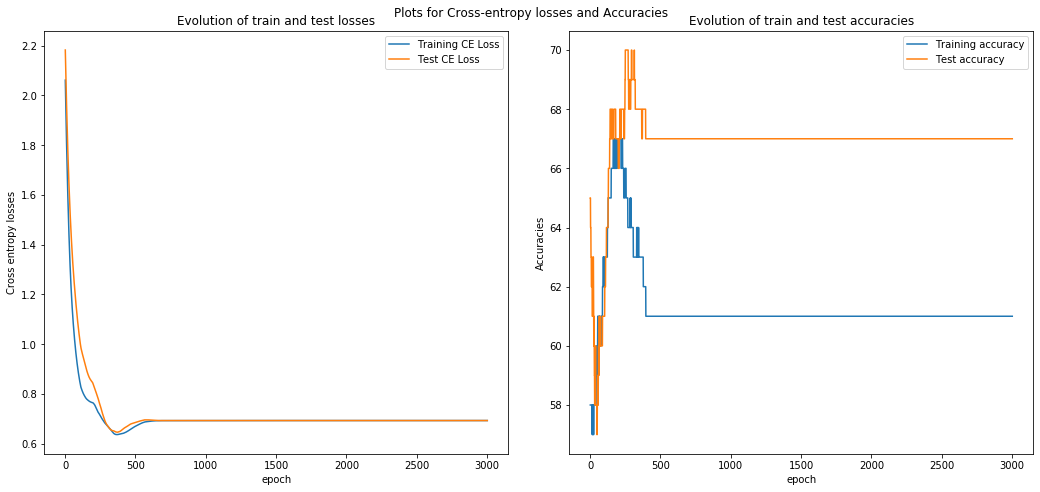

In [78]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
    
fig.tight_layout(pad=3)
ax[0].plot(results_NN_self['epoch'],results_NN_self['Train_loss'],label="Training CE Loss")
ax[0].plot(results_NN_self['epoch'],results_NN_self['Test_loss'],label="Test CE Loss")
ax[0].legend() 
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Cross entropy losses')
ax[0].set_title("Evolution of train and test losses")

ax[1].plot(results_NN_self['epoch'],results_NN_self['Train_acc'],label="Training accuracy")
ax[1].plot(results_NN_self['epoch'],results_NN_self['Test_acc'],label="Test accuracy")
ax[1].legend()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Accuracies')
ax[1].set_title("Evolution of train and test accuracies")
plt.suptitle("Plots for Cross-entropy losses and Accuracies")
plt.show()

### Problem 5: First order optimization methods

In [50]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# Implemented with assistance from pytorch source
import torch
from torch.optim.optimizer import Optimizer, required

In [51]:
'''
1. Momentum method with parameter β = .9
'''
class SGD_Momentum(Optimizer):
    def __init__(self, params, lr=required, momentum=0):
        defaults = dict(lr=lr, momentum=momentum)
        super(SGD_Momentum, self).__init__(params, defaults)
        pass
    
    def step(self):
        for group in self.param_groups:
            momentum=group['momentum']
            lr = group['lr']
            for p in group['params']:
                d_p = p.grad.data
                param_state = self.state[p]
                if 'momentum_buffer' not in param_state: 
                    # get the current derivative of p, and detach
                    buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
                else: 
                    # momentum exists from previous state
                    buf = param_state['momentum_buffer']
                    # v_dw = beta*v_dW + dW
                    # buf_t = buf_t-1*momentum +  d_p
                    buf.mul_(momentum).add_(d_p)
                d_p = buf # new change
                p.data.add_(-lr, d_p)

'''
2. Nesterov’s accelerated gradient (NAG) method with parameter β = .95
'''
class Nesterov(Optimizer):
    def __init__(self, params, lr=required, momentum=0):
        defaults = dict(lr=lr, momentum=momentum)
        super(Nesterov, self).__init__(params, defaults)
        pass
    
    def step(self):
        for group in self.param_groups:
            momentum = group['momentum']
            lr = group['lr']
            for p in group['params']:
                d_p = p.grad.data
                param_state = self.state[p]
                if 'momentum_buffer' not in param_state: 
                    # get the current derivative of p, and detach
                    buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
                else: 
                    # momentum exists from previous state
                    buf = param_state['momentum_buffer']
                    buf.mul_(momentum).add_(1, d_p)
                # update change with momentum (main diff in nesterov
                d_p = d_p.add(momentum, buf) 
                p.data.add_(-lr, d_p)

'''
3. RMSprop with parameters β = .9, γ = 1 and  = 10−8
'''
class RMSprop(Optimizer):
    def __init__(self, params, lr=1e-2, alpha=0.99, eps=1e-8, \
                 weight_decay=0, momentum=0, centered=False):
            defaults = dict(lr=lr, momentum=momentum, alpha=alpha,\
                            eps=eps, centered=centered, weight_decay=weight_decay)
            super(RMSprop, self).__init__(params, defaults)
            pass
    
    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                state = self.state[p]
                
                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['square_avg'] = torch.zeros_like(p.data)
                    state['momentum_buffer'] = torch.zeros_like(p.data)
                
                square_avg = state['square_avg']
                alpha = group['alpha']
                
                state['step'] += 1

                square_avg.mul_(alpha).addcmul_(1 - alpha, grad, grad)
                avg = square_avg.sqrt().add_(group['eps'])
                buf = state['momentum_buffer']
                buf.mul_(group['momentum']).addcdiv_(grad, avg)
                p.data.add_(-group['lr'], buf)
                
'''
4. Adam with parameters β1 = .9, β2 = .999 and  = 10−8
'''
class Adam(Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False):
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad)
        super(Adam, self).__init__(params, defaults)
    def step(self, closure=None):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                amsgrad = group['amsgrad']
                state = self.state[p]
                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                beta1, beta2 = group['betas']
                state['step'] += 1
                # fixing bias
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1
                p.data.addcdiv_(-step_size, exp_avg, denom)


In [52]:
batch_sizes = [1,500,60000]
test_batch_size = 1000
epochs = 10
learning_rate = 0.001
momentum = 0.5

class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = self.fc1(x)
        return F.softmax(x, dim=1)

In [53]:
def train(model, device, train_loader, criterion, optimizer, epoch):
    train_loss = 0
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        data_ = data.view(data.size(0), -1)
        output = model(data_)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % (len(train_loader)//2) == 0:
            print('Train({})[{:.0f}%]: Loss: {:.4f}'.format(
                epoch, 100. * batch_idx / len(train_loader), train_loss/(batch_idx+1)))
            pass
        pass
    pass


def test(model, device, test_loader, criterion, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data_ = data.view(data.size(0), -1)
            output = model(data_)
            test_loss += criterion(output, target).item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss = (test_loss*batch_size)/len(test_loader.dataset)
    print('Test({}): Loss: {:.4f}, Accuracy: {:.4f}%'.format(
        epoch, test_loss, 100. * correct / len(test_loader.dataset)))

In [54]:
def make_optimizer(optimizer_name, model, **kwargs):
    if optimizer_name=='Adam':
        optimizer = optim.Adam(model.parameters(),lr=kwargs['lr'])
    elif optimizer_name=='Momentum':
        optimizer = SGD_Momentum(model.parameters(),lr=kwargs['lr'],momentum=kwargs['momentum'])
    elif optimizer_name=='Nesterov':
        optimizer = Nesterov(model.parameters(),lr=kwargs['lr'],momentum=kwargs['momentum'])
    elif optimizer_name=='RMSprop':
        optimizer = RMSprop(model.parameters(),lr=kwargs['lr'],momentum=kwargs['momentum'],\
                           alpha=kwargs['alpha'],eps=kwargs['eps'])
    elif optimizer_name=='Adam':
        optimizer = Adam(model.parameters(),lr=kwargs['lr'],momentum=kwargs['momentum'],\
                           alpha=kwargs['alpha'],eps=kwargs['eps'])
    else:
        raise ValueError('Not valid optimizer name')
    return optimizer
    
def make_scheduler(scheduler_name, optimizer, **kwargs):
    if scheduler_name=='MultiStepLR':
        scheduler = optim.lr_scheduler.MultiStepLR(optimizer,milestones=kwargs['milestones'],\
                                                   gamma=kwargs['factor'])
    else:
        raise ValueError('Not valid scheduler name')
    return scheduler

In [63]:
lambdas= [0.01, 0.1, 1]
torch.manual_seed(200)
for batch_size in batch_sizes:
    print("Batch Size:", batch_size)
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        shuffle=True)
    optimizer_name = 'Momentum'
    device = 'cpu'
    device = torch.device(device)
    data_name = 'mnist'
    scheduler_name = 'MultiStepLR'
    num_epochs = epochs
    lr = learning_rate
    model = LogReg().to(device)
    
    optimizer = make_optimizer(optimizer_name, model, lr=lr, momentum=0.9)
    scheduler = make_scheduler(scheduler_name, optimizer, milestones=[5], factor=0.1)
    for lambd in lambdas:
        print("Lambda:",lambd)
        criterion = nn.CrossEntropyLoss(weight=torch.Tensor(np.ones(10)*lambd))
        for epoch in range(1, num_epochs + 1):
            train(model, device, train_loader, criterion, optimizer, epoch)
            test(model, device, test_loader, criterion, epoch)
            scheduler.step()
            print('Optimizer Learning rate: {0:.4f}'.format(optimizer.param_groups[0]['lr']))

Batch Size: 1
Lambda: 0.01
Train(1)[0%]: Loss: 2.3464
Train(1)[50%]: Loss: 1.6816
Test(1): Loss: 1.6316, Accuracy: 82.9300%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 1.6415
Test(2): Loss: 1.6339, Accuracy: 82.6600%
Optimizer Learning rate: 0.0100
Train(3)[0%]: Loss: 1.4612
Train(3)[50%]: Loss: 1.6341
Test(3): Loss: 1.6291, Accuracy: 83.1700%
Optimizer Learning rate: 0.0100
Train(4)[0%]: Loss: 1.4612
Train(4)[50%]: Loss: 1.6290
Test(4): Loss: 1.6299, Accuracy: 83.0600%
Optimizer Learning rate: 0.0100
Train(5)[0%]: Loss: 1.4612
Train(5)[50%]: Loss: 1.6293
Test(5): Loss: 1.6259, Accuracy: 83.4700%
Optimizer Learning rate: 0.0010
Train(6)[0%]: Loss: 1.4612
Train(6)[50%]: Loss: 1.6223
Test(6): Loss: 1.6213, Accuracy: 83.9200%
Optimizer Learning rate: 0.0010
Train(7)[0%]: Loss: 1.4612
Train(7)[50%]: Loss: 1.6223
Test(7): Loss: 1.6205, Accuracy: 84.0500%
Optimizer Learning rate: 0.0010
Train(8)[0%]: Loss: 1.4612
Train(8)[50%]: Loss: 1.6170
Test(8): Loss: 

ZeroDivisionError: integer division or modulo by zero

In [80]:
epochs=3
lambdas= [0.01, 0.1, 1]
torch.manual_seed(200)
for batch_size in batch_sizes:
    print("Batch Size:", batch_size)
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        shuffle=True)
    optimizer_name = 'RMSprop'
    device = 'cpu'
    device = torch.device(device)
    data_name = 'mnist'
    scheduler_name = 'MultiStepLR'
    num_epochs = epochs
    lr = learning_rate
    model = LogReg().to(device)
    
    optimizer = make_optimizer(optimizer_name, model, lr=lr, momentum=0.01,alpha=0.1,eps=10e-8)
    scheduler = make_scheduler(scheduler_name, optimizer, milestones=[5], factor=0.1)
    for lambd in lambdas:
        print("Lambda:",lambd)
        criterion = nn.CrossEntropyLoss(weight=torch.Tensor(np.ones(10)*lambd))
        for epoch in range(1, num_epochs + 1):
            train(model, device, train_loader, criterion, optimizer, epoch)
            test(model, device, test_loader, criterion, epoch)
            scheduler.step()
            print('Optimizer Learning rate: {0:.4f}'.format(optimizer.param_groups[0]['lr']))

Batch Size: 1
Lambda: 0.01
Train(1)[0%]: Loss: 2.3464
Train(1)[50%]: Loss: 1.9492
Test(1): Loss: 2.0831, Accuracy: 37.5900%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 2.1158
Test(2): Loss: 2.1328, Accuracy: 32.6300%
Optimizer Learning rate: 0.0100
Train(3)[0%]: Loss: 2.4612
Train(3)[50%]: Loss: 2.1396
Test(3): Loss: 2.1411, Accuracy: 31.8100%
Optimizer Learning rate: 0.0100
Lambda: 0.1
Train(1)[0%]: Loss: 2.4612
Train(1)[50%]: Loss: 2.1461
Test(1): Loss: 2.1535, Accuracy: 30.6500%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 2.4516
Train(2)[50%]: Loss: 2.1540
Test(2): Loss: 2.1542, Accuracy: 30.5500%
Optimizer Learning rate: 0.0010
Train(3)[0%]: Loss: 2.4612
Train(3)[50%]: Loss: 2.1500
Test(3): Loss: 2.1527, Accuracy: 30.6100%
Optimizer Learning rate: 0.0010
Lambda: 1
Train(1)[0%]: Loss: 1.4612
Train(1)[50%]: Loss: 2.1494
Test(1): Loss: 2.1548, Accuracy: 30.3400%
Optimizer Learning rate: 0.0010
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 

ZeroDivisionError: integer division or modulo by zero

In [81]:
epochs=3
lambdas= [0.01, 0.1, 1]
torch.manual_seed(200)
for batch_size in batch_sizes:
    print("Batch Size:", batch_size)
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        shuffle=True)
    optimizer_name = 'Adam'
    device = 'cpu'
    device = torch.device(device)
    data_name = 'mnist'
    scheduler_name = 'MultiStepLR'
    num_epochs = epochs
    lr = learning_rate
    model = LogReg().to(device)
    
    optimizer = make_optimizer(optimizer_name, model, lr=lr, momentum=0.01,alpha=0.1,eps=10e-8)
    scheduler = make_scheduler(scheduler_name, optimizer, milestones=[5], factor=0.1)
    for lambd in lambdas:
        print("Lambda:",lambd)
        criterion = nn.CrossEntropyLoss(weight=torch.Tensor(np.ones(10)*lambd))
        for epoch in range(1, num_epochs + 1):
            train(model, device, train_loader, criterion, optimizer, epoch)
            test(model, device, test_loader, criterion, epoch)
            scheduler.step()
            print('Optimizer Learning rate: {0:.4f}'.format(optimizer.param_groups[0]['lr']))

Batch Size: 1
Lambda: 0.01
Train(1)[0%]: Loss: 2.3464
Train(1)[50%]: Loss: 2.1204
Test(1): Loss: 2.0967, Accuracy: 36.4300%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 2.0865
Test(2): Loss: 2.0863, Accuracy: 37.4700%
Optimizer Learning rate: 0.0100
Train(3)[0%]: Loss: 1.4612
Train(3)[50%]: Loss: 2.0899
Test(3): Loss: 2.0900, Accuracy: 37.1100%
Optimizer Learning rate: 0.0100
Lambda: 0.1
Train(1)[0%]: Loss: 2.4612
Train(1)[50%]: Loss: 2.0852
Test(1): Loss: 2.0858, Accuracy: 37.5300%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 2.0915
Test(2): Loss: 2.0895, Accuracy: 37.1500%
Optimizer Learning rate: 0.0010
Train(3)[0%]: Loss: 1.4612
Train(3)[50%]: Loss: 2.0828
Test(3): Loss: 2.0868, Accuracy: 37.4300%
Optimizer Learning rate: 0.0010
Lambda: 1
Train(1)[0%]: Loss: 2.4612
Train(1)[50%]: Loss: 2.0852
Test(1): Loss: 2.0862, Accuracy: 37.4900%
Optimizer Learning rate: 0.0010
Train(2)[0%]: Loss: 2.4612
Train(2)[50%]: Loss: 

ZeroDivisionError: integer division or modulo by zero

In [82]:
batch_sizes = [1,500]
epochs=3
lambdas= [0.01, 0.1, 1]
torch.manual_seed(200)
for batch_size in batch_sizes:
    print("Batch Size:", batch_size)
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        shuffle=True)
    optimizer_name = 'Nesterov'
    device = 'cpu'
    device = torch.device(device)
    data_name = 'mnist'
    scheduler_name = 'MultiStepLR'
    num_epochs = epochs
    lr = learning_rate
    model = LogReg().to(device)
    
    optimizer = make_optimizer(optimizer_name, model, lr=lr, momentum=0.01,alpha=0.1,eps=10e-8)
    scheduler = make_scheduler(scheduler_name, optimizer, milestones=[5], factor=0.1)
    for lambd in lambdas:
        print("Lambda:",lambd)
        criterion = nn.CrossEntropyLoss(weight=torch.Tensor(np.ones(10)*lambd))
        for epoch in range(1, num_epochs + 1):
            train(model, device, train_loader, criterion, optimizer, epoch)
            test(model, device, test_loader, criterion, epoch)
            scheduler.step()
            print('Optimizer Learning rate: {0:.4f}'.format(optimizer.param_groups[0]['lr']))

Batch Size: 1
Lambda: 0.01
Train(1)[0%]: Loss: 2.3464
Train(1)[50%]: Loss: 1.5927
Test(1): Loss: 1.5538, Accuracy: 91.1400%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 1.5503
Test(2): Loss: 1.5425, Accuracy: 92.1200%
Optimizer Learning rate: 0.0100
Train(3)[0%]: Loss: 1.4612
Train(3)[50%]: Loss: 1.5440
Test(3): Loss: 1.5413, Accuracy: 92.3000%
Optimizer Learning rate: 0.0100
Lambda: 0.1
Train(1)[0%]: Loss: 1.4612
Train(1)[50%]: Loss: 1.5405
Test(1): Loss: 1.5388, Accuracy: 92.3800%
Optimizer Learning rate: 0.0100
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 1.5372
Test(2): Loss: 1.5393, Accuracy: 92.3700%
Optimizer Learning rate: 0.0010
Train(3)[0%]: Loss: 1.4612
Train(3)[50%]: Loss: 1.5311
Test(3): Loss: 1.5349, Accuracy: 92.7900%
Optimizer Learning rate: 0.0010
Lambda: 1
Train(1)[0%]: Loss: 1.4612
Train(1)[50%]: Loss: 1.5311
Test(1): Loss: 1.5347, Accuracy: 92.8100%
Optimizer Learning rate: 0.0010
Train(2)[0%]: Loss: 1.4612
Train(2)[50%]: Loss: 